<a href="https://colab.research.google.com/github/kdChen07/Financial_Engineering/blob/main/asa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [51]:
N1=10000
N2=100
S0=33
K=34
a=2
X=35
T=1
t_delta=T/N2
sigma=0.3
r=0.05

In [3]:
S=np.zeros((N1,N2))
S[:,0]=S0
S

array([[33.,  0.,  0., ...,  0.,  0.,  0.],
       [33.,  0.,  0., ...,  0.,  0.,  0.],
       [33.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [33.,  0.,  0., ...,  0.,  0.,  0.],
       [33.,  0.,  0., ...,  0.,  0.,  0.],
       [33.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
for i in range(0,N1):
  Epsilon = np.random.normal(0, 1, N2)
  for t in range(1,N2):
    S[i,t]=S[i,t-1]+a*(X-max(S[i,t-1],0))*t_delta+sigma*math.sqrt(max(S[i,t-1],0))*math.sqrt(t_delta)*Epsilon[t]

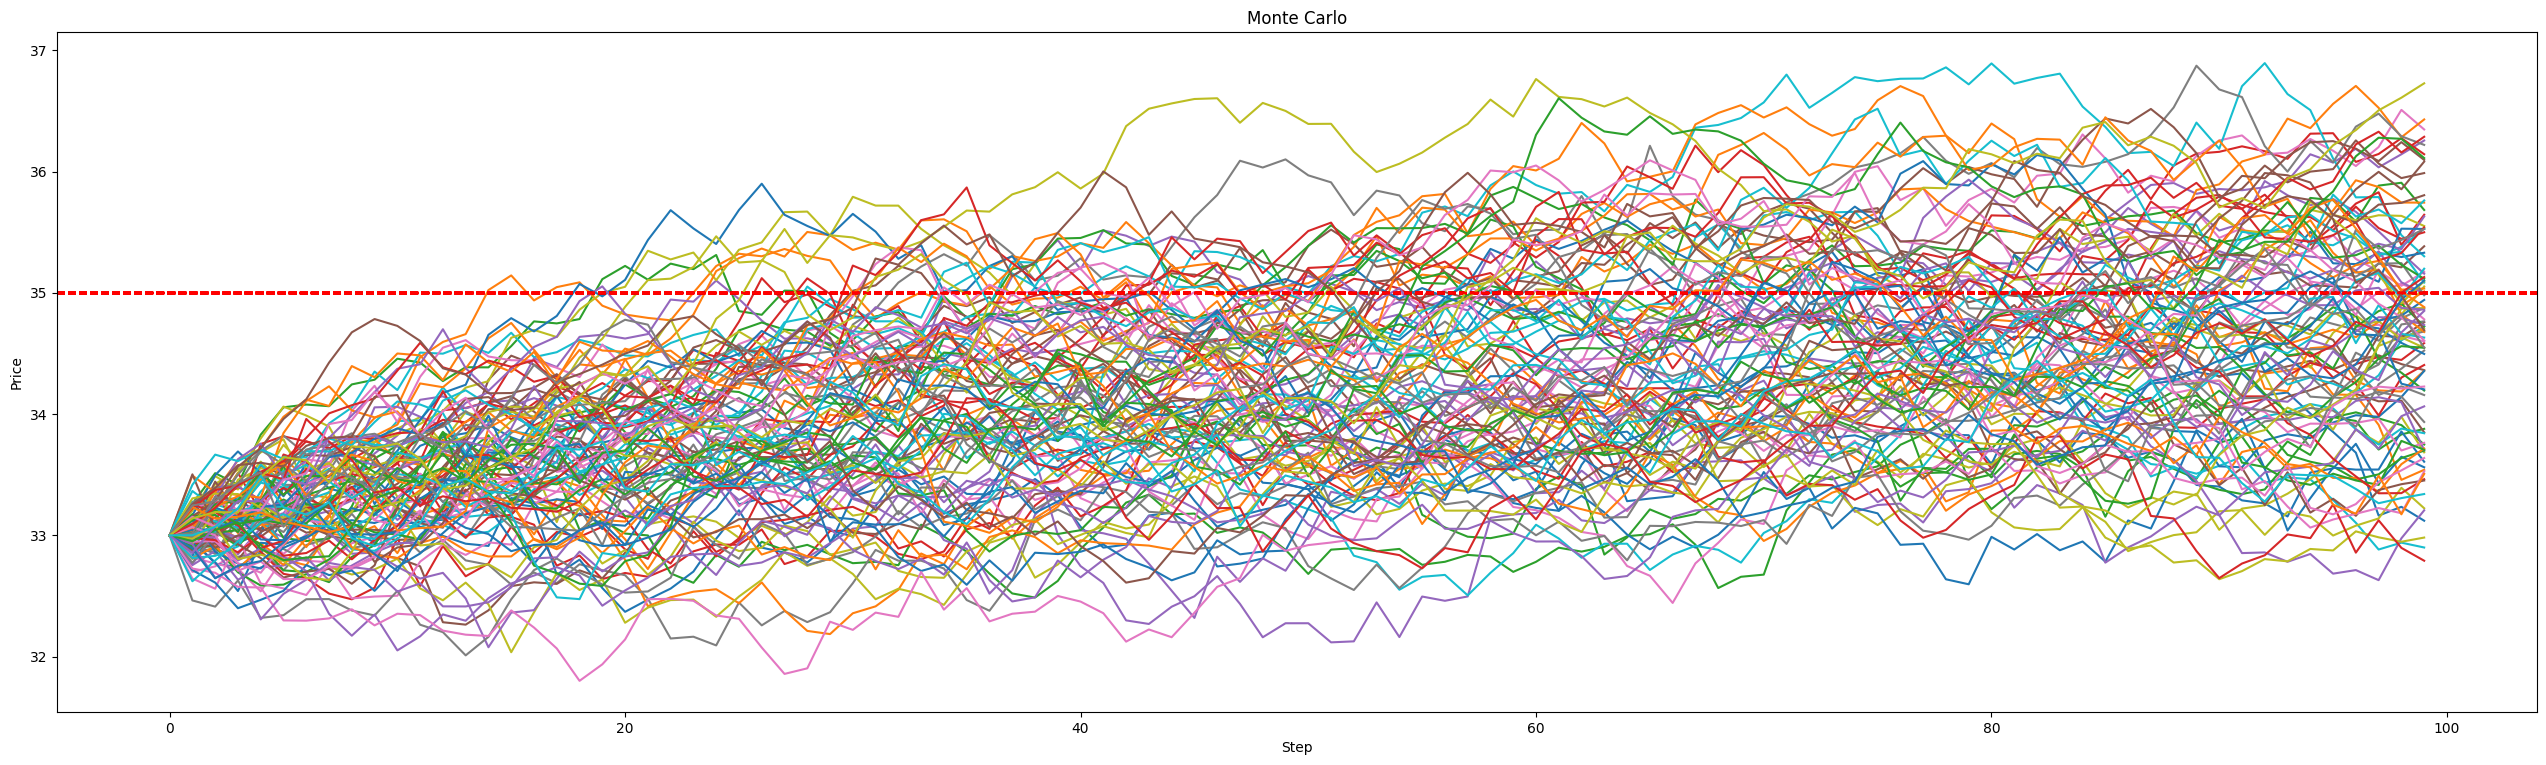

In [5]:
x = np.arange(0,N2,1)
plt.subplots(figsize=(32,9),dpi=100)
for i in range(0,N2):
  plt.plot(x, S[i,:])
  plt.title('Monte Carlo')
  plt.xlabel('Step')
  plt.ylabel('Price')
  plt.axhline(35, color='r', ls='dashed', lw=1.5,
            label='均值')

#欧式

In [76]:
sum=0
for i in range(0,N1):
  sum=sum+max(S[i,N2-1]-K,0)

In [77]:
mc=sum/10000

In [78]:
mc=mc*math.exp(-r*T)
mc

0.7793743568412151

#亚式

In [9]:
ST=np.zeros(N1)
for i in range(0,N1):
  for j in range(0,N2):
     ST[i]=ST[i]+S[i,j]
ST

array([3367.39562674, 3387.75945295, 3392.61792908, ..., 3315.38496685,
       3403.35854993, 3500.20546194])

In [59]:
df=pd.DataFrame(ST/N2-K)

In [65]:
df

,0
0,-0.326044
1,-0.122405
2,-0.073821
3,-0.089559
4,0.706358
...,...
9995,0.664236
9996,-0.844860
9997,-0.846150
9998,0.033585


In [67]:
c=np.array(df)
c

array([[-0.32604373],
       [-0.12240547],
       [-0.07382071],
       ...,
       [-0.84615033],
       [ 0.0335855 ],
       [ 1.00205462]])

In [73]:
d=np.zeros(N1)
d

array([0., 0., 0., ..., 0., 0., 0.])

In [74]:
for i in range(0,N1):
  d[i]=max(c[i],0)

In [88]:
d

array([0.        , 0.        , 0.        , ..., 0.        , 0.0335855 ,
       1.00205462])

In [89]:
asa=d
asa=asa*math.exp(-r*T)
asa

array([0.        , 0.        , 0.        , ..., 0.        , 0.03194752,
       0.95318384])

In [90]:
sum_asa=0
for i in range(0,N1):
  sum_asa=sum_asa+asa[i]
sum_asa=sum_asa/N1
sum_asa

0.2744793702156825